In [258]:
import matplotlib.pyplot as plt

In [259]:
with open('2cel-rs.csv') as first, open('2cel.csv') as second, open('cel-rs.csv') as third, open('cel.csv') as fourth, open('rsel.csv') as fifth:
    data = list()
    data.append(fifth.readlines())
    data.append(third.readlines())
    data.append(first.readlines())
    data.append(fourth.readlines())
    data.append(second.readlines())
    for j in range(len(data)):
        for i in range(len(data[j])):
            data[j][i] = data[j][i].split(',')

In [260]:
means = [list(), list(), list(), list(), list()]
efforts = [list(), list(), list(), list(), list()]
gens = [list(), list(), list(), list(), list()]
ind = 0
for row in data:
    for i in range(1,len(row)):
        row[i] = list(map(float, row[i]))
        means[ind].append(sum(row[i][2:])/32*100)
        efforts[ind].append(row[i][1] / 1000)
        gens[ind].append(row[i][0])
    ind += 1

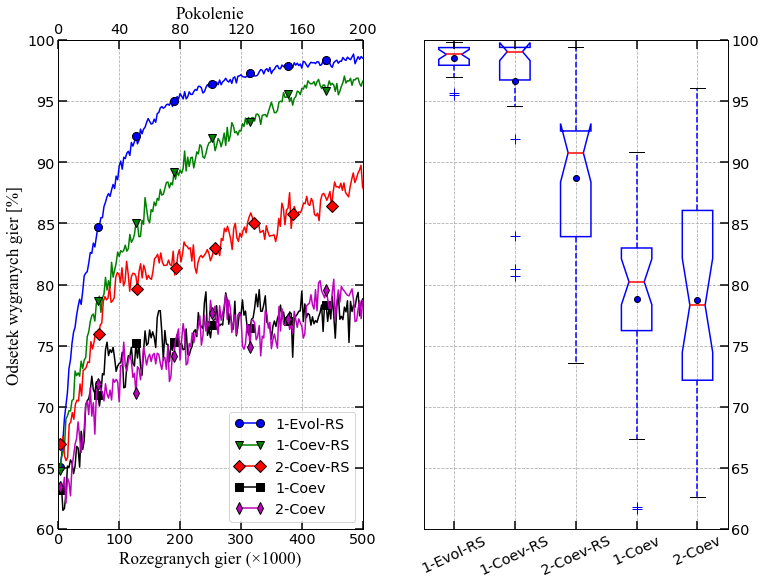

In [303]:
labels = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']
colours = ['b', 'g', 'r', 'k', 'm']
markers = ['o', 'v', 'D', 's', 'd']

#Wykres liniowy

ind = 0
fig, axis = plt.subplots(1, 2, figsize=(12,9));
ax2 = axis[0].twiny();
ax3 = axis[0].twinx();
for i in range(len(data)):
    axis[0].plot(efforts[i], means[i], label=labels[ind], color=colours[ind],
                 markevery=25, marker=markers[ind], mec='k', ms=8);
    ind += 1
axis[0].legend(numpoints=2, loc='lower right', fontsize='x-large');
axis[0].set_xlabel('Rozegranych gier (×1000)', fontsize='xx-large', fontname='Times New Roman');
axis[0].set_ylabel('Odsetek wygranych gier [%]', fontsize='xx-large', fontname='Times New Roman');
axis[0].set_xlim(0, 500);
axis[0].set_xticks(range(0,501,100));
axis[0].set_ylim(60, 100);
axis[0].tick_params(direction='in', length=8.5, width=1.5, labelsize='x-large');
ax2.set_xlabel('Pokolenie', fontsize='xx-large', fontname='Times New Roman');
ax2.set_xlim(0, 200);
ax2.set_xticks(range(0,201,40));
ax2.tick_params(direction='in', length=8.5, width=1.5, labelsize='x-large');
ax3.set_ylim(60,100);
ax3.set_yticks(range(60, 101, 5));
ax3.set_yticklabels([]);
ax3.tick_params(direction='in', length=8.5, width=1.5, labelsize='x-large');
axis[0].grid(linestyle='--',axis='both');

#Wykres pudełkowy

box = list()
for row in data:
    box.append(row[-1][2:])

for row in box:
    for i in range(len(row)):
        row[i] *= 100
    
axis[1].boxplot(box, True, showmeans=True, patch_artist=True, boxprops=dict(facecolor=(1,1,1,0), color='b',lw=1.5),
               meanprops=dict(mfc='b', mec='k', marker='o'), whiskerprops=dict(linestyle='--',color='b',lw=1.5),
               flierprops=dict(marker='+',mec='b', ms=10.0), medianprops=dict(lw=1.5, color='r'));    
axis[1].yaxis.tick_right();
axis[1].set_xticklabels(labels=labels, rotation=25, fontsize='x-large');
axis[1].tick_params(direction='in', length=8.5, width=1.5, labelsize='x-large');
axis[1].set_ylim(60, 100);
axis[1].set_yticks(range(60,101,5));
axis[1].grid(linestyle='--',axis='both');
ax4 = axis[1].twiny();
ax4.tick_params(direction='in', length=8.5, width=1.5);
ax4.set_xticklabels([]);
ax4.set_xlim(axis[1].get_xlim());